In [42]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Investigacion acerca del tema: 

Mayo Clinic - STRIP AI Clasificación de la imagen del origen del coágulo sanguíneo del accidente cerebrovascular

¿Qué es un accidente cerebrovascular isquémico?

Un accidente cerebrovascular es una lesión cerebral causada por una interrupción del flujo sanguíneo. El tejido cerebral que no recibe oxígeno y nutrientes de la sangre puede morir en minutos. El daño cerebral puede causar una pérdida repentina de las funciones corporales. Los tipos de función afectados dependen de la parte del cerebro que sufre el daño. (Furie, Kasner, Adams, 2010)

¿Por que se genera?
El ACV isquémico agudo se genera por oclusión de un vaso arterial e implica daños permanentes por isquemia; no obstante, si la oclusión es transitoria y se autorresuelve, se presentarán manifestaciones momentáneas, lo cual haría referencia a un ataque isquémico transitorio, que se define como un episodio de déficit neurológico focal por isquemia cerebral, de menos de 60 minutos de duración, completa resolución posterior, y sin cambios en las neuroimágenes. (et al, 2019)

¿Como se diagnostica el ACV?
El diagnóstico del ACV isquémico agudo es clínico y los estudios imagenológicos se realizan con el fin de detectar hemorragia, evaluar el grado de lesión e identificar el territorio vascular
afectado. En la mayoria de casos se utiliza la tomografía axial computarizada (TAC). 

En la TAC  se pueden observar otros elementos como cambios isquémicos tempranos dados por hipodensidades leves del parénquima con pérdida de la diferenciación de las sustancias gris y blanca. Los infartos antiguos que se observan como hipodensidades bien definidas del parénquima y la hiperdensidad de una arteria se asocia con oclusión trombótica de grandes vasos. (et al, 2019)

¿Cuales son los sintomas?
Los signos y síntomas se manifiestan según la localización y extensión de la lesión. Los principales territorios vasculares que pueden
verse alterados son:
1. Circulación anterior: arteria carótida interna, arteria cerebral media y anterior. 
2. Arteria cerebral anterior: presentará hemiparesia e hipoestesia contralateral de predominio crural, disartria, incontinencia urinaria, apatía, abulia, desinhibición y mutismo acinético en caso de daño bilateral. 
3. Arteria cerebral media en su porción más proximal (M1) presentará hemiplejia e hipoestesia contralateral, hemianopsia homónima, desviación forzada de la mirada, alteración del estado de conciencia y afasia si se afecta el hemisferio dominante. Las porciones M2-M3 se presentarán con hemiparesia e hipoestesia contralateral, disartria, afasia si se afecta el hemisferio dominante, y hemiamopsia homónima en compromiso de M2. Si el daño es en la porción M4, presentará los mismos signos y síntomas, pero de forma menos severa, y presentará más afectación de funciones corticales como el lenguaje, así como disgrafia, discalculia, agrafoestesia, apraxias o debutar con crisis.
4. Circulación posterior: arteria cerebral posterior, arteria basilar y arteria vertebral.
5. Arteria cerebral posterior: afectación del campo visual contralateral, agnosia visual, o ceguera cortical o crisis visuales.
6. Territorio vertebrobasilar: pueden presentar compromiso cerebeloso o troncoencefálico de acuerdo con la arteria afectada. Existe daño de la punta de la basilar, que se presentará con compromiso del estado de conciencia, alteraciones pupilares u oculomotoras, cerebelosas, y compromiso motor de las cuatro extremidades, que en caso de no ser identificado y tratado, puede llevar al paciente a la muerte en pocas horas. (et al, 2019)


# Situacion problematica:

Coágulos sanguíneos en el ictus isquémico (manejo terapeutico y prevencion de segundo accidente cerebrovascular)

Un accidente cerebrovascular es una lesión cerebral causada por una interrupción del flujo sanguíneo. El tejido cerebral que no recibe oxígeno y nutrientes de la sangre puede morir en minutos. El daño cerebral puede causar una pérdida repentina de las funciones corporales. Los tipos de función afectados dependen de la parte del cerebro que sufre el daño. (Furie, Kasner, Adams, 2010)

Se busca ayudar a los proveedores de atencion medica identificar mejor los orígenes de los coágulos de sangre en los accidentes cerebrovasculares mortales, lo que facilitará que los médicos prescriban el mejor manejo terapéutico posterior al accidente cerebrovascular y reducirá la probabilidad de un segundo accidente cerebrovascular.

# Problema cientifico:
Es necesario poder desarrollar una IA que nos permita clasificar ambas etiologias de coágulos sanguíneos en el ictus isquémico, siendo estas: 
1.  aterosclerosis cardíaca
2.  arterial grande

Para realizar esto se utilizaran imágenes de patología digital de diapositivas completas para construir un modelo de clasificacion. 


#   Objetivos:
##  Objetivo General:
Crear un modelo de IA que por medio de imagenes de patologias digitales, diferencie y clasifique entre e los dos principales subtipos de etiología del accidente cerebrovascular isquémico agudo (SIA): aterosclerosis cardíaca y arterial grande.
##  Objetivos especificos:
1. Utilizar las distintas herramientas de python para poder cargar, analizar y manipular imagenes de accidentes cerebrovasculares de formato .TIF
2. Desarrollar un algoritmo que permita la optimizacion y compresion de los arhivos con formato .TIF para facilitar la carga y manejo de las imagenes.

Referencias:
Furie KL, Kasner SE, Adams RJ, et al. Guidelines for the Prevention of Stroke in Patients With Stroke or Transient Ischemic Attack: A Guideline for Healthcare Professionals From the American Heart Association/American Stroke Association. Stroke. 2010 October 21.

García-Alfonso C, Martínez Reyes A, García V, Ricaurte-Fajardo A, Torres I, Coral J. Actualización en diagnóstico y tratamiento del ataque cerebrovascular isquémico agudo. Univ. Med.
2019;60(3). https://doi.org/10.11144/Javeriana.umed60-3.actu.

In [43]:
df = pd.read_csv("data/train.csv")
df.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


## Descripcion de los datos

1. image_id es object, debido a que tiene un string mezclado de valores numericos y no numericos; Un identificador único para esta instancia con el formato {patient_id}_{image_num}. Corresponde a la imagen {image_id}.tif.

2. center_id es int64, es decir integer; Identifica el centro médico donde se obtuvo la diapositiva.

3. patient_id es de tipo object, es un string con caracteres numericos y no numericos; Identifica al paciente del que se obtuvo la diapositiva.

4. image_num es int64, integer; Enumera imágenes de coágulos obtenidos del mismo paciente.

5. label es object, en este caso string por que es la etiqueta de clasificacion; La etiología del coágulo, ya sea CE o LAA. Este campo es el objetivo de clasificación.

### Operaciones de limpieza

El dataframe (train.csv) realmente cuenta con un formato ordenado, conforme al primer contacto con los datos como grupo se determino que muchas de las imagenes cuentan con resoluciones distintas, es por ello que es necesario realizar una normalizacion para los archivos .TIF, ademas el conjunto de imagenes cuenta con un peso de alrededor de 234 GB. Muchas de las imagenes son con un peso entre 600 MB  a 1.5 GB, por ello se realizara una seleccion de imagenes que cuenten con un peso reducido de manera que se facilite la manipulacion y construccion de la IA.

Cuando las imagenes esten seleccionadas y normalizadas, es necesario modificar el dataframe de manera que los archivos .TIF que no sean necesarios sea eliminados o se realice una construccion de un dataframe solo con la informacion de las imagenes seleccionadas para el proyecto.


In [44]:
total_count = df.count()[0]

In [45]:
CE_count = df.where(df['label'] == 'CE').count()[0]

In [46]:
LAA_count = df.where(df['label'] == 'LAA').count()[0]

In [47]:
print(f'Proporción de CE: {CE_count/total_count*100:.2f}%')

Proporción de CE: 72.55%


In [48]:
print(f'Proporción de LAA: {LAA_count/total_count*100:.2f}%')

Proporción de LAA: 27.45%


In [49]:
CE_count/LAA_count

2.642512077294686

Las clases están muy desbalanceadas

No es factible trabajar con algunas imágenes del data set porque estas ocupan más de un GB. Por lo que se trabajará con las imágenes con menor  tamaño. A continuación se presenta un analisis de algunas imágenes.

In [50]:
Image.MAX_IMAGE_PIXELS = None
im = Image.open("data/008e5c_0.tif") #CE

In [51]:
im.size

(5946, 29694)

In [52]:
im = np.array(im)

In [53]:
im.shape

(29694, 5946, 3)

In [54]:
im = np.add.reduce(im, axis=2)//3
im.shape

(29694, 5946)

In [55]:
im.mean()

232.8209309743553

In [56]:
im.mean(where=(im < 255))

155.78840696142225

In [57]:
np.median(im)

255.0

In [58]:
im2 = np.array(Image.open("data/026c97_0.tif"))
im2.shape

(8267, 10533, 3)

In [59]:
im2 = np.add.reduce(im2, axis=2)//3
im2.shape

(8267, 10533)

In [60]:
im2.mean()

224.17265025157073

In [61]:
im2.mean(where=(im2 < 255))

173.64449469839235

In [62]:
np.median(im2)

255.0

La gran mayoría de los pixeles de las imágenes son blancos. 

In [63]:
im3 = Image.open("data/00c058_0.tif") #LAA

In [64]:
im3 = np.array(im3)

In [65]:
im3 = np.add.reduce(im3, axis=2)//3
im3.shape

(61801, 15255)

In [66]:
im3.mean()

239.3327863519141

In [67]:
im3.mean(where=(im3 < 255))

239.33134010242537

In [68]:
np.median(im3)

250.0

## Analisis exploratorio de los datos

In [69]:
df.head()


,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [70]:
df.dtypes

image_id      object
center_id      int64
patient_id    object
image_num      int64
label         object
dtype: object

Podemos ver que para el dataframe correspondiente del cvs train (train.csv) contamos con 5 columnas:
image_id es object, debido a que tiene un string mezclado de valores numericos y no numericos; Un identificador único para esta instancia con el formato {patient_id}_{image_num}. Corresponde a la imagen {image_id}.tif.

center_id es int64, es decir integer; Identifica el centro médico donde se obtuvo la diapositiva.

patient_id es de tipo object, es un string con caracteres numericos y no numericos; Identifica al paciente del que se obtuvo la diapositiva.

image_num es int64, integer; Enumera imágenes de coágulos obtenidos del mismo paciente.

label es object, en este caso string por que es la etiqueta de clasificacion; La etiología del coágulo, ya sea CE o LAA. Este campo es el objetivo de clasificación.


In [71]:
df.describe()

,center_id,image_num
count,754.000000,754.000000
mean,7.115385,0.226790
std,3.504306,0.599046
min,1.000000,0.000000
25%,4.000000,0.000000
50%,7.000000,0.000000
75%,11.000000,0.000000
max,11.000000,4.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    754 non-null    object
 1   center_id   754 non-null    int64 
 2   patient_id  754 non-null    object
 3   image_num   754 non-null    int64 
 4   label       754 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.6+ KB


In [79]:
# Tablas de frecuencia para las distribuciones label
	
df.label.value_counts()


CE     547
LAA    207
Name: label, dtype: int64

In [87]:
#Proporciones para ambas etiquetas
print(f'Proporción de CE: {CE_count/total_count*100:.2f}%')
print(f'Proporción de LAA: {LAA_count/total_count*100:.2f}%')

Proporción de CE: 72.55%
Proporción de LAA: 27.45%


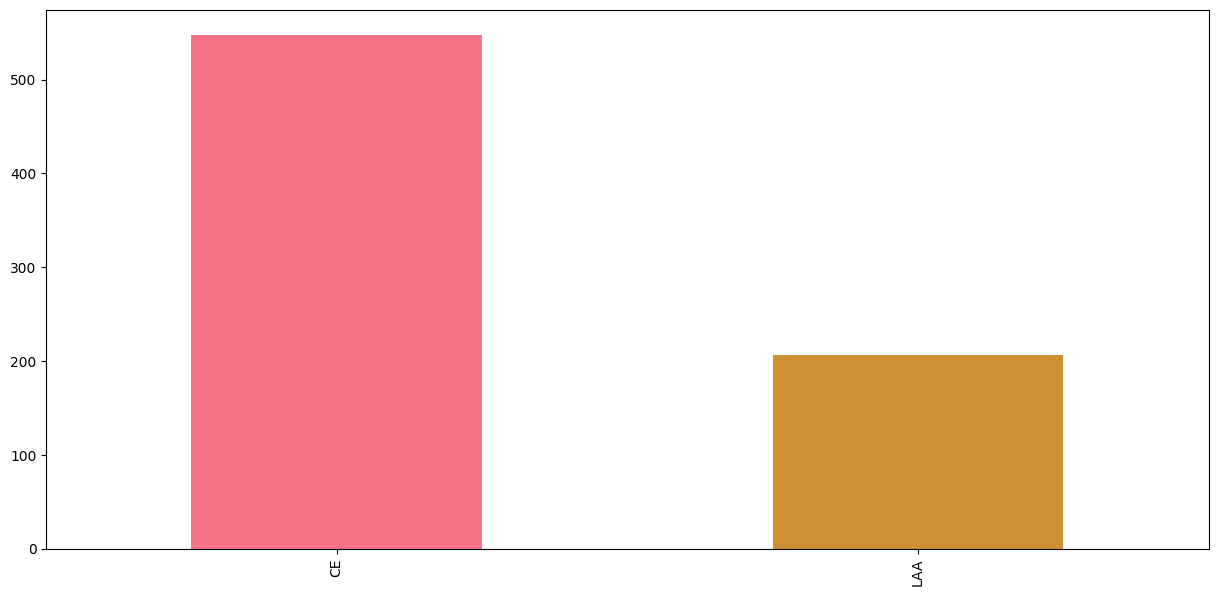

In [73]:
# print(df['label'].value_counts())
label = df['label'].value_counts()
label

# sns.barplot(data=label)
label.plot(kind='bar', x = 'label', y = 'cantidad de casos', figsize=(15, 7), color=sns.color_palette("husl", 8))
plt.show()

Realizando un recorrido a traves de la variable label, se puede observar que la variable label es categorica, y que la variable label tiene 2 categorias CE o LAA. 
En el dataframe podemos observar que existen para CE una cantidad de valores: 547 y para LAA una cantidad de valores: 207. 
Esto nos indica que mas de la mitad de los valores estan categorizados como CE. 

In [77]:
#tablas de frecuencia para center id lo cual nos indica en que centro medico fue sacada la imagen
df.center_id.value_counts()

11    257
4     114
7      99
1      54
3      49
10     44
6      38
5      38
2      29
9      16
8      16
Name: center_id, dtype: int64

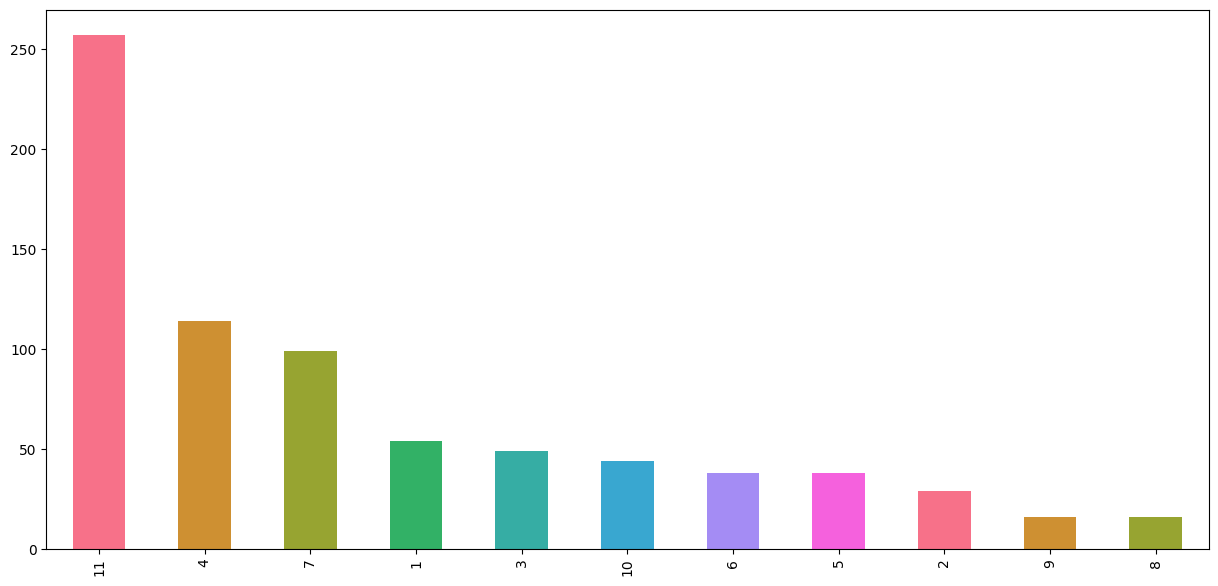

In [86]:
# print(df['label'].value_counts())
center_id = df['center_id'].value_counts()
center_id

# sns.barplot(data=label)
center_id.plot(kind='bar', x = 'id de centro medico', y = 'cantidad de imagenes', figsize=(15, 7), color=sns.color_palette("husl", 8))
plt.show()

In [83]:
#tablas de frecuencia para los pacientes, cuantas imagenes hay para cada paciente
df.patient_id.value_counts()
QtyPaciente = df['patient_id'].value_counts()

09644e    5
56d177    5
3d10be    5
91b9d3    5
f40c69    4
         ..
507ac9    1
8be762    1
c97365    1
2ecb46    1
579988    1
Name: patient_id, Length: 632, dtype: int64